In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
data = pd.read_csv('C:\\Users\\kirill\\Desktop\\project_case\\titanic_train.csv',
                  index_col='PassengerId')

In [59]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [64]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Mid
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mid
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mid
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Young
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Young


In [7]:
def age_category(age):
  
    if age < 30:
        return 1
    elif age > 60:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age ]

In [63]:
data['Age_category'] = data.Age.apply(lambda x: "Young" if x<30 else "Old" if x>60 else "Mid" )

In [10]:
#количество мужчин и женщин
males_count = data[(data.Sex == "male")]["Sex"].count() 
females_count = data[(data.Sex == "female")]["Sex"].count()

males_count, females_count

(577, 314)

In [11]:
#распределение по классам в текстовом формате 
for pclass, count in data.groupby("Pclass"):
    print("В",pclass,"-м классе", data[(data.Pclass == pclass)]["Name"].count(),"пассажиров",
         "(",data[(data.Pclass == pclass) &(data.Sex == "male")]["Name"].count(),"мужчин,",
          data[(data.Pclass == pclass) &(data.Sex == "female")]["Name"].count(),"женщин)")  

В 1 -м классе 216 пассажиров ( 122 мужчин, 94 женщин)
В 2 -м классе 184 пассажиров ( 108 мужчин, 76 женщин)
В 3 -м классе 491 пассажиров ( 347 мужчин, 144 женщин)


In [12]:
#распределение по классам в табличном виде 
data['Male'] = (data['Sex'] == "male").astype(int)
data['Female'] = (data['Sex'] == "female").astype(int)
data.groupby('Pclass')['Male', 'Female'].agg("sum")

,Male,Female
Pclass,,
1,122,94
2,108,76
3,347,144


In [13]:
#распределение по классам в табличном виде 
data.groupby('Pclass')['Name'].agg("count")

Pclass
1    216
2    184
3    491
Name: Name, dtype: int64

In [14]:
print("Медиана:",  data["Fare"].median(), "," ,
      "Стандартное отклонение:",data["Fare"].std())

Медиана: 14.4542 , Стандартное отклонение: 49.693428597180905


In [15]:
print("Выжило среди молодых (возраст менее 30): "
      "{:.2%}".format
      (data[(data.Survived == 1) & (data.Age < 30)]["Name"].count()/data [(data.Age<30)]["Name"].count()),
     ) 
print("Выжило среди пожилых (возраст более 60): "
      "{:.2%}".format
      (data[(data.Survived == 1) & (data.Age > 60)]["Name"].count()/data[(data.Age>60)]["Name"].count())
     )

Выжило среди молодых (возраст менее 30): 40.62%
Выжило среди пожилых (возраст более 60): 22.73%


In [16]:
print("Выжило среди мужчин: "
    "{:.1%}".format
      (data[(data.Survived == 1) & (data.Sex == "male")]["Name"].count()/data [(data.Sex == "male")]["Name"].count()),)

print("Выжило среди женщин: "
    "{:.1%}".format
      (data[(data.Survived == 1) & (data.Sex == "female")]["Name"].count()/data[(data.Sex == "female")]["Name"].count()))

Выжило среди мужчин: 18.9%
Выжило среди женщин: 74.2%


In [17]:
data['FirstName'] = data['Name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1]
data['FirstName'].value_counts().head(5)
#самое популярное - William

William    34
John       22
Anna       15
George     14
Mary       14
Name: FirstName, dtype: int64

In [18]:
print(
      "Распределение среднего возраста по классам среди мужчин;",
      data[data.Sex == "male"].groupby('Pclass')['Age'].agg("mean"),
      
      "Распределение среднего возраста по классам среди женщин:",
      data[data.Sex == "female"].groupby('Pclass')['Age'].agg("mean"),
      
      "Распределение среднего возраста по классам среди всех пассажиров:",
      data.groupby('Pclass')['Age'].agg("mean")
   )
     
# В среднем мужчины 1-го класса старше 40 лет
# Мужчины всех классов в среднем старше женщин того же класса
# В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

Распределение среднего возраста по классам среди мужчин; Pclass
1    41.281386
2    30.740707
3    26.507589
Name: Age, dtype: float64 Распределение среднего возраста по классам среди женщин: Pclass
1    34.611765
2    28.722973
3    21.750000
Name: Age, dtype: float64 Распределение среднего возраста по классам среди всех пассажиров: Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


C:\Users\kirill\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


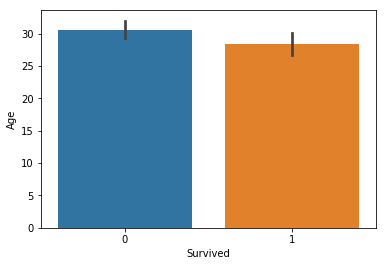

In [87]:
sns.barplot(data['Survived'], data['Age'], data=data.dropna());


C:\Users\kirill\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


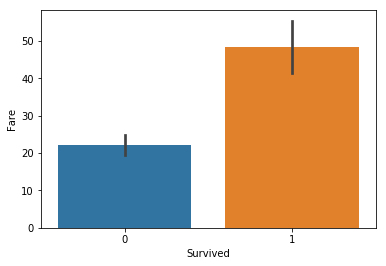

In [86]:
sns.barplot(data['Survived'], data['Fare'],  data=data.dropna());